In [3]:
#mengimport library yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
#mengimport data dan menampilkannya
data = pd.read_csv('D:\CODING\PROJECT\COLLEGE\DATA\data_pinjaman.csv')
data.head()

,Umur,Pemasukan,Keluarga,Edukasi,Hipotek,Pinjaman Pribadi,Rekening Efek,Sertifikat Deposito,Online,Kartu Kredit
0,35,81,3,2,104,0,0,0,1,0
1,34,180,1,3,0,1,0,0,0,0
2,38,130,4,3,134,1,0,0,0,0
3,46,193,2,3,0,1,0,0,0,0
4,56,25,4,2,111,0,0,0,1,0


In [5]:
#melihat informasi data dan ternyata tidak ada null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Umur                 960 non-null    int64
 1   Pemasukan            960 non-null    int64
 2   Keluarga             960 non-null    int64
 3   Edukasi              960 non-null    int64
 4   Hipotek              960 non-null    int64
 5   Pinjaman Pribadi     960 non-null    int64
 6   Rekening Efek        960 non-null    int64
 7   Sertifikat Deposito  960 non-null    int64
 8   Online               960 non-null    int64
 9   Kartu Kredit         960 non-null    int64
dtypes: int64(10)
memory usage: 75.1 KB


In [6]:
#melihat informasi data secara statistik
data.describe()

,Umur,Pemasukan,Keluarga,Edukasi,Hipotek,Pinjaman Pribadi,Rekening Efek,Sertifikat Deposito,Online,Kartu Kredit
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000
mean,45.308333,105.629167,2.492708,2.058333,75.584375,0.500000,0.112500,0.164583,0.600000,0.286458
std,11.660059,53.940530,1.154376,0.812271,132.366844,0.500261,0.316145,0.370997,0.490153,0.452342
min,23.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,55.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,111.000000,3.000000,2.000000,0.000000,0.500000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,152.250000,4.000000,3.000000,118.250000,1.000000,0.000000,0.000000,1.000000,1.000000
max,66.000000,203.000000,4.000000,3.000000,617.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#memindahan kolom pinjaman pribadi ke paling kanan
pinjaman = data.pop('Pinjaman Pribadi')
data.insert(len(data.columns),'Pinjaman Pribadi', pinjaman)
data.head()

,Umur,Pemasukan,Keluarga,Edukasi,Hipotek,Rekening Efek,Sertifikat Deposito,Online,Kartu Kredit,Pinjaman Pribadi
0,35,81,3,2,104,0,0,1,0,0
1,34,180,1,3,0,0,0,0,0,1
2,38,130,4,3,134,0,0,0,0,1
3,46,193,2,3,0,0,0,0,0,1
4,56,25,4,2,111,0,0,1,0,0


In [8]:
#memisahkan data independent dan dependent
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [9]:
#melakukan train test split data dengan test size 25%
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.25,random_state = 42)

In [10]:
#melakukan scaling pada data
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()

xtrain = scx.fit_transform(xtrain)

xtest = scx.transform(xtest)


# BERNOULLI

In [11]:
#mengimport model bernoulli
from sklearn.naive_bayes import BernoulliNB

classifier_bern = BernoulliNB()

#training model
classifier_bern.fit(xtrain, ytrain)

#testing model
ypred_bern = classifier_bern.predict(xtest)

In [12]:
#mengimport accuracy score dan menampilkan hasil akurasi dari model bernouli
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred_bern))

0.875


<AxesSubplot: >

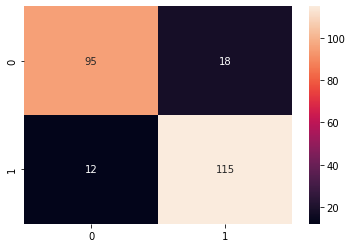

In [13]:
#BERNOULLI
from sklearn.metrics import confusion_matrix

#membandingkan data test dan prediksi
cm = confusion_matrix(ytest,ypred_bern)

#menampilkan hasil evaluasi menggunakan heatmap
sns.heatmap(cm,annot=True,fmt='.0f')

In [14]:
#menampilkan report dari model bernoulli
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_bern))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       113
           1       0.86      0.91      0.88       127

    accuracy                           0.88       240
   macro avg       0.88      0.87      0.87       240
weighted avg       0.88      0.88      0.87       240



# GAUSSIAN

In [15]:
from sklearn.naive_bayes import GaussianNB

classifier_gaus = GaussianNB()
#train model
classifier_gaus.fit(xtrain, ytrain)
#testing model
ypred_gaus = classifier_gaus.predict(xtest)

In [16]:
#menampilkan skor dari model
print(accuracy_score(ytest,ypred_gaus))

0.8625


<AxesSubplot: >

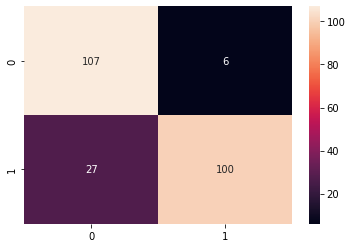

In [17]:
#GAUSSIAN
from sklearn.metrics import confusion_matrix

#membandingkan data test dan prediksi
cm = confusion_matrix(ytest,ypred_gaus)

#menampilkan hasil evaluasi menggunakan heatmap
sns.heatmap(cm,annot=True,fmt='.0f')

In [18]:
#menampilkan report dari model bernoulli
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_gaus))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       113
           1       0.94      0.79      0.86       127

    accuracy                           0.86       240
   macro avg       0.87      0.87      0.86       240
weighted avg       0.88      0.86      0.86       240



# multinomial
model ini tidak cocok untuk data yang sedang kita pakai dikarenakan biasanya multinomial digunakan untuk klasifikasi data teks

In [19]:
#melakukan train test split data dengan test size 25%
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.25,random_state = 42)

In [20]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
#train model
mnb.fit(xtrain, ytrain)
#testing model
ypred_mnb = mnb.predict(xtest)


In [21]:
#menampilkan skor dari model
print(accuracy_score(ytest,ypred_mnb))

0.725


<AxesSubplot: >

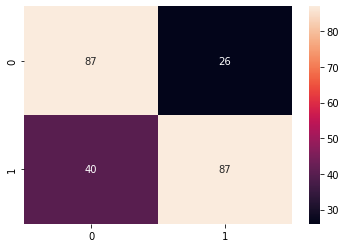

In [22]:
#MULTINOMIAL
from sklearn.metrics import confusion_matrix

#membandingkan data test dan prediksi
cm = confusion_matrix(ytest,ypred_mnb)

#menampilkan hasil evaluasi menggunakan heatmap
sns.heatmap(cm,annot=True,fmt='.0f')

In [23]:
#menampilkan report dari model bernoulli
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_mnb))

              precision    recall  f1-score   support

           0       0.69      0.77      0.72       113
           1       0.77      0.69      0.72       127

    accuracy                           0.73       240
   macro avg       0.73      0.73      0.72       240
weighted avg       0.73      0.72      0.72       240



# PREDICTION

In [24]:
# membuat data baru untuk prediksi
coba = np.array([[35, 81, 3, 2, 104, 0, 0, 1, 0, ],
                     [34, 180, 1, 3, 0, 0, 0, 0, 0, ],
                     [38, 130, 4, 3, 134, 0, 0, 0, 0, ],
                     [46, 193, 2, 3, 0, 0, 0, 0, 0, ],
                     [56, 25, 4, 2, 111, 0, 0, 1, 0, ]])

coba = scx.transform(coba)

c:\Users\msi-pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [25]:
#melakukan prediksi pada data baru dengan hasil model dari bernoulli
prediksi = classifier_bern.predict(coba)
print(f'HASIL PREDIKSI: {prediksi}\n0 = tidak pinjaman pribadi\n1 = pinjaman pribadi')

HASIL PREDIKSI: [0 1 1 1 0]
0 = tidak pinjaman pribadi
1 = pinjaman pribadi


In [26]:
#melakukan prediksi pada data baru dengan hasil model dari gaussian
prediksi = classifier_gaus.predict(coba)
print(f'HASIL PREDIKSI: {prediksi}\n0 = tidak pinjaman pribadi\n1 = pinjaman pribadi')

HASIL PREDIKSI: [0 1 1 1 0]
0 = tidak pinjaman pribadi
1 = pinjaman pribadi


In [27]:
#melakukan prediksi pada data baru dengan hasil model dari multinomial
prediksi = mnb.predict(coba)
print(f'HASIL PREDIKSI: {prediksi}\n0 = tidak pinjaman pribadi\n1 = pinjaman pribadi')

HASIL PREDIKSI: [0 1 1 1 0]
0 = tidak pinjaman pribadi
1 = pinjaman pribadi


c:\Users\msi-pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


# KESIMPULAN
multinomial mempunyai hasil yang kurang bagus, namun
kedua model lainnya mempunyai hasil yang sangat baik dan hampir sama, dimana akurasinya untuk bernouli 87.5% dan gaussian 86.25%. <br>
namun dalam kasus kita yaitu memprediksi pinjaman pribadi maka bernoulli lebih baik, selain akurasi yang lebih besar recall bernoulli juga seimbang dan tinggi dalam memprediksi 2 nilai (0 dan 1)